## Project UTS 

Project tentang Klasifikasi Judul Berita Olahraga dari Platfom Detik

List  Anggota Kelompok PBA:

- Emmanuel Mathew Krisna Rata /200710530

- Antonius Indra Wardhana / 200710542

- Farrel Rayner Nathanael Geovano / 200710560

- Edmond Sorensen / 200710617

- Paulus Bayu Kurnia Wicaksono / 200710691  


Inisialisasi

In [3]:
import numpy as np
import pandas as pd
import modSpellChecker as sc
from contractions_id import CONTRACTION_MAP
import re
import nltk
import string
from nltk.stem import WordNetLemmatizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import gensim
from gensim.models import Word2Vec
from gensim import models
#from pattern.en import tag
from nltk.corpus import wordnet as wn
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from gensim import corpora, models
import sklearn
#from normalization import normalize_corpus
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from datetime import datetime
import csv

In [4]:
dataset = pd.read_csv('antaranews_sport.csv')
dataset

,title,author,category,date,content,link
0,Sebanyak 10 ribu pelari berlomba di Jakarta Ma...,Author not found,Category not found,"Minggu, 22 Oktober 2023 11:38 WIB",\n\t\t\t\tJakarta (ANTARA) - Sekitar 10 ribu p...,https://www.antaranews.com/berita/3786069/seba...
1,Max Verstappen menangi Sprint Race Grand Prix AS,Author not found,Formula 1,"Minggu, 22 Oktober 2023 08:31 WIB",\n\t\t\t\tJakarta (ANTARA) - Juara dunia terba...,https://www.antaranews.com/berita/3785916/max-...
2,Jakarta Marathon 2023 siapkan total hadiah Rp1...,Author not found,Category not found,"Minggu, 22 Oktober 2023 11:41 WIB",\n\t\t\t\tJakarta (ANTARA) - Panitia penyeleng...,https://www.antaranews.com/berita/3786075/jaka...
3,35 tim ramaikan ajang Permata Hijau Suites 3x3...,Author not found,Bola Basket,"Minggu, 22 Oktober 2023 04:59 WIB",\n\t\t\t\tJakarta (ANTARA) - Sebanyak 35 tim m...,https://www.antaranews.com/berita/3785826/35-t...
4,Suparni Yati persembahkan medali pertama Indon...,Author not found,Asian Para Games 2022,"Senin, 23 Oktober 2023 12:18 WIB","\n\t\t\t\tHangzhou, China (ANTARA) - Atlet Par...",https://www.antaranews.com/berita/3787179/supa...
...,...,...,...,...,...,...
719,Martin harap bisa pertahankan tren positif di ...,Author not found,MotoGP,"Sabtu, 14 Oktober 2023 21:27 WIB",\n\t\t\t\tLombok Tengah (ANTARA) - Pebalap Pri...,https://www.antaranews.com/berita/3774069/mart...
720,OnePrix 2023 putaran 4 kembali bergulir di Sir...,Author not found,Category not found,"Sabtu, 16 September 2023 06:50 WIB",\n\t\t\t\tJakarta (ANTARA) - OnePrix 2023 puta...,https://www.antaranews.com/berita/3729402/onep...
721,Durant dan LeBron berambisi wakili AS di Olimp...,Author not found,Olimpiade,"Selasa, 3 Oktober 2023 09:26 WIB",\n\t\t\t\tJakarta (ANTARA) - Sejumlah pemain t...,https://www.antaranews.com/berita/3753921/dura...
722,"Lomba ""dragon boat"" tandai di Pasaman Barat mi...",Author not found,Category not found,"Senin, 25 September 2023 15:52 WIB",\nSelama ini arena dayung sampan atau dragon b...,https://www.antaranews.com/berita/3742551/lomb...


Melakukan Penghapusan Category yang tidak tidak di gunakaan

In [5]:
kategori_tidak_ingin_dihapus = ['Category not found']

dataset = dataset[~dataset['category'].isin(kategori_tidak_ingin_dihapus)]

In [6]:
dataset.shape

(460, 6)

In [7]:
df2 = dataset.groupby(['category'])['title'].count()
df2

category
ASEAN 2023                 1
Artikel                    1
Asian Games 2022         126
Asian Para Games 2022     35
Atletik                    5
Balap Sepeda               2
Berkuda                    2
Bola Basket               11
Bola Voli                  8
Bulu tangkis              75
Catur                      8
E-Sport                   19
Formula 1                 22
Formula E                  2
Formula One                1
Golf                       1
IBL                       12
Liga 1 Indonesia           1
Liga Italia                1
Liga Spanyol               1
Mix Martial Art            2
Moto2                      1
MotoGP                    55
Motorsport                15
NBA                        5
Olimpiade                  1
Panjat Tebing              1
Piala Dunia FIBA          21
Piala Dunia U17            1
Renang                     1
Sport Tourism              3
Sportainment               3
Taekwondo                  1
Telaah                     1
Tenis

In [8]:
label = dataset.iloc[:,2]
feature = dataset.iloc[:,0]

In [9]:
label[0:10]

1                 Formula 1
3               Bola Basket
4     Asian Para Games 2022
5                     Catur
6     Asian Para Games 2022
9     Asian Para Games 2022
10                      NBA
11             Bulu tangkis
12             Bulu tangkis
13                      IBL
Name: category, dtype: object

In [10]:
feature[0:10]

1      Max Verstappen menangi Sprint Race Grand Prix AS
3     35 tim ramaikan ajang Permata Hijau Suites 3x3...
4     Suparni Yati persembahkan medali pertama Indon...
5     Sebanyak 472 pecatur bersaing raih juara JAPFA...
6     Menpora semangati para-atlet Indonesia dengan ...
9     NPC Indonesia siapkan sembilan perenang ikuti ...
10    Debut bersama Bucks, Damian Lillard tampil due...
11    Ganda putra benahi kekurangan tim jelang Denma...
12    Jojo gagal amankan tiket 16 besar karena ditun...
13    Satria Muda juarai IBL 3x3 2023 usai kalahkan ...
Name: title, dtype: object

In [11]:
#fungsi2 untuk normalisasi dataset
character =['z','y','x','w','v','u','t','s','r','q','p','o','n','m','l','k','j','i','h','g','f','e','d','c','b','a',',','.',';',':','-','...','?','!','(',')','[',']','{','}','<','>','"','/','\'','#','-','@']
def repeatcharNormalize(text):
    for i in range(len(character)):
        charac_long = 5
        while charac_long>=2:
            char=character[i]*charac_long
            text=text.replace(char,character[i])
            charac_long-=1
        return text
def spellNormalize(text):
    spellCheck = []
    for i in text:
        if i not in character:
            j=sc.correction(i)
            spellCheck.append(j)
        else:
            spellCheck.append(i)
        return spellCheck
def tokenize_text(text):
    tokens=nltk.word_tokenize(text)
    tokens=[token.strip() for token in tokens]
    return tokens
def expand_contractions(text, contraction_mapping):
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())),
    flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())
        expanded_contraction = first_char + expanded_contraction[1:]
        return expanded_contraction
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'","", expanded_text)
    return expanded_text
def stemmer_text(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = stemmer.stem(text)
    return text
# def lemmatize_text(text):
# pos_tagged_text = pos_tag_text(text)
# lemmatized_tokens = [wnl.lemmatize(word, pos_tag) if pos_tag
# else word for word,
# pos_tag in pos_tagged_text]
# lemmatize_text=' '.join(lemmatized_tokens)
# return lemmatize_text

In [12]:
def remove_special_characters(text):
    tokens = tokenize_text(text)
    pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
    filtered_tokens = filter(None, [pattern.sub('',token) for token in tokens])
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
factory = StopWordRemoverFactory()
stopword_list = factory.get_stop_words()
def remove_stopwords(text):
    tokens = tokenize_text(text)
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
def normalize_corpus(corpus, tokenize=False):
    normalized_corpus = []
    for text in corpus:
        text = expand_contractions(text, CONTRACTION_MAP)
        text = stemmer_text(text)
        text = remove_special_characters(text)
        text = repeatcharNormalize(text)
        text = remove_stopwords(text)
        normalized_corpus.append(text)
        if tokenize:
            text = tokenize_text(text)
            text = spellNormalize(text)
            normalized_corpus.append(text)
    return normalized_corpus

In [13]:
#training dataset
def prepare_datasets(corpus, labels, test_data_proportion=0.3):
    train_X, test_X, train_Y, test_Y = train_test_split(corpus, labels,
    test_size=0.33,random_state=42)
    return train_X, test_X, train_Y, test_Y
train_corpus, test_corpus, train_labels, test_labels = prepare_datasets(feature,
                                                                        label,test_data_proportion=0.3)

Melakukan Proses Normalisasi DataSet

In [14]:
 #memanggil fungsi normalisasi dataset yang telah ditraining
norm_train_corpus = normalize_corpus(train_corpus)

In [15]:
norm_train_corpus[0:10]

['klasemen medali asi games 2022 indonesia turun peringkat 13',
 'jbl ride 2023 jadi ajang temu gemar balap sepeda indonesia',
 'saut tantang wakil thailand 16 besar bni indonesia masters 2023',
 'lebron curry sebut wakil as olimpiade paris',
 'kondisi angin jadi kendala duet kano putri indonesia asi games',
 'djokovic swiatek mulai musim 2024 tampil perth',
 'kontingen indonesia asi games 2022 kuat 415 atlet',
 'tak wakil indonesia semifinal bulu tangkis asi games 2022',
 'triyaningsih tips buat lari mula ikut marathon',
 'el rumi siap lawan jefri nichol tanding tinju superstar knockout']

In [16]:
norm_test_corpus = normalize_corpus(test_corpus)

In [17]:
norm_test_corpus[0:10]

['ester makin dekat tahan gelar juara tunggal putri iic',
 'stephanie empat final iic 2023 usai kalah rekan negara',
 'klasemen medali asi games indonesia naik peringkat tujuh',
 'langkah tenis aldila sutjiadi mulus asi games 2022',
 'bal hingga bangka belitung ramai basket pon 2024',
 'milo run cipta gaya hidup sehat masyarakat',
 'hamilton russell panjang kontrak mercedes hingga 2025',
 'round up tambah medali indonesia geser peringkat 13',
 'ginting sebut siap mental jadi kunci menang',
 'balap moto2 ai ogura nikmat soto jelang balap mandalika']

In [18]:
#Fungsi untuk mengekstraksi feature menggunakan TF-IDF Model
def tfidf_transformer(bow_matrix):
    transformer = TfidfTransformer(norm='l2',
                                    smooth_idf=True,
                                    use_idf=True)
    tfidf_matrix = transformer.fit_transform(bow_matrix)
    return transformer, tfidf_matrix
def tfidf_extractor(corpus, ngram_range=(1,1)):
    vectorizer = TfidfVectorizer(min_df=1,
                                norm='l2',
                                smooth_idf=True,
                                use_idf=True,
                                ngram_range=ngram_range)
    features = vectorizer.fit_transform(corpus)
    return vectorizer, features

In [19]:
#mengunakan model TF-IDF untuk mengekstraksi feature
tfidf_vectorizer, tfidf_train_features = tfidf_extractor(norm_train_corpus)
tfidf_test_features = tfidf_vectorizer.transform(norm_test_corpus)

Membuat Model 

In [20]:
#kami mengevaluasi model menggunakan fungsi train_predict_evaluate_model
#kami mengukur nilai accuracy,precission, recall, dan F1 score apakan nilainya sudah sesuai atau tidak. Jika nilainya mendekati 1 maka proses klasifikasi berhasil
from sklearn.linear_model import SGDClassifier
train_features=tfidf_train_features
train_labels=train_labels
test_features=tfidf_test_features
test_labels=test_labels

In [21]:
df_train = pd.DataFrame()
df_train['norm_train'] = norm_train_corpus
df_train['train_labels'] = train_labels
df_test = pd.DataFrame()
df_test['norm_test'] = norm_test_corpus
df_test['test_labels'] = test_labels

In [22]:
df_train.head()

,norm_train,train_labels
0,klasemen medali asi games 2022 indonesia turun...,NaN
1,jbl ride 2023 jadi ajang temu gemar balap sepe...,NaN
2,saut tantang wakil thailand 16 besar bni indon...,NaN
3,lebron curry sebut wakil as olimpiade paris,Bola Basket
4,kondisi angin jadi kendala duet kano putri ind...,Asian Para Games 2022


In [23]:
df_test.head()

,norm_test,test_labels
0,ester makin dekat tahan gelar juara tunggal pu...,NaN
1,stephanie empat final iic 2023 usai kalah reka...,Formula 1
2,klasemen medali asi games indonesia naik perin...,NaN
3,langkah tenis aldila sutjiadi mulus asi games ...,NaN
4,bal hingga bangka belitung ramai basket pon 2024,NaN


In [24]:
train_features[0:1]

<1x989 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [25]:
train_labels[0:1]

222    Asian Games 2022
Name: category, dtype: object

In [26]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [27]:
clf = SGDClassifier(loss='hinge', max_iter=100)
#clf = LinearSVC(penalty='l2', loss='squared_hinge', max_iter=100)
#clf = MultinomialNB()

In [28]:
clf.fit(train_features, train_labels)
predictions = clf.predict(test_features)
print("Label test: \n" + format(test_labels[:10]))
print("Prediction test: \n"+ format(predictions[:10]))

Label test: 
195             Bulu tangkis
44              Bulu tangkis
317    Asian Para Games 2022
689         Asian Games 2022
245              Bola Basket
367             Sportainment
639                Formula 1
463         Asian Games 2022
364         Asian Games 2022
116                    Moto2
Name: category, dtype: object
Prediction test: 
['Bulu tangkis' 'Bulu tangkis' 'Asian Games 2022' 'Asian Games 2022'
 'Liga Italia' 'Asian Games 2022' 'MotoGP' 'Asian Games 2022'
 'Asian Games 2022' 'MotoGP']


In [29]:
print("Accuration: "+format(clf.score(test_features,test_labels)))

Accuration: 0.7236842105263158


In [30]:
def get_metrics(true_labels, predicted_labels):
    print('Accuracy: ', np.round(metrics.accuracy_score(true_labels,
                                                        predicted_labels),2))
    print('Precision: ', np.round(metrics.precision_score(true_labels,
                                                        predicted_labels,
                                                        average='weighted'),2))
    print('Recall: ', np.round(metrics.recall_score(true_labels,
                                                        predicted_labels,
                                                        average='weighted'),2))
    print('F1 Score: ', np.round(metrics.f1_score(true_labels,
                                                        predicted_labels,
                                                        average='weighted'),2))
# mengevaluasi performa prediksi menggunakan model
get_metrics(true_labels=test_labels,predicted_labels=predictions)

Accuracy:  0.72
Precision:  0.73
Recall:  0.72
F1 Score:  0.71


/home/krisna/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/krisna/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
test = ('Jeka Saragih On Fire Menatap Debut di UFC')

In [32]:
line = tfidf_vectorizer.transform([test])
line.shape

(1, 989)

In [33]:
line

<1x989 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [34]:
test = clf.predict(line)

In [35]:
test

array(['E-Sport'], dtype='<U21')

## Model GridSearch SV

In [36]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [37]:
from sklearn.feature_selection import SelectKBest, chi2

# Include feature selection in the pipeline
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=1, norm='l2', smooth_idf=True, use_idf=True, ngram_range=(1, 1))),
    ('chi2', SelectKBest(chi2, k=1000)),  
    ('clf', SGDClassifier(loss='hinge', max_iter=100))
])

In [38]:
param_grid = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)],  
    'chi2__k': [1000, 2000, 5000],  
    'clf__alpha': [0.0001, 0.001, 0.01],
    'clf__max_iter': [100, 1000, 10000]
}

In [39]:
grid_search = GridSearchCV(text_clf, param_grid, cv=5, n_jobs=-1, verbose=2)

In [40]:
grid_search.fit(train_corpus, train_labels)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


/home/krisna/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV] END chi2__k=1000, clf__alpha=0.0001, clf__max_iter=100, tfidf__ngram_range=(1, 1); total time=   0.0s
[CV] END chi2__k=1000, clf__alpha=0.0001, clf__max_iter=100, tfidf__ngram_range=(1, 1); total time=   0.0s
[CV] END chi2__k=1000, clf__alpha=0.0001, clf__max_iter=100, tfidf__ngram_range=(1, 1); total time=   0.1s
[CV] END chi2__k=1000, clf__alpha=0.0001, clf__max_iter=100, tfidf__ngram_range=(1, 2); total time=   0.1s
[CV] END chi2__k=1000, clf__alpha=0.0001, clf__max_iter=100, tfidf__ngram_range=(1, 1); total time=   0.0s
[CV] END chi2__k=1000, clf__alpha=0.0001, clf__max_iter=100, tfidf__ngram_range=(1, 2); total time=   0.3s[CV] END chi2__k=1000, clf__alpha=0.0001, clf__max_iter=100, tfidf__ngram_range=(1, 1); total time=   0.0s

[CV] END chi2__k=1000, clf__alpha=0.0001, clf__max_iter=100, tfidf__ngram_range=(1, 2); total time=   0.2s
[CV] END chi2__k=1000, clf__alpha=0.0001, clf__max_iter=100, tfidf__ngram_range=(2, 2); total time=   0.1s
[CV] END chi2__k=1000, clf__alpha=0.0

/home/krisna/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
261 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/home/krisna/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/krisna/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/krisna/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 416,

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('chi2',
                                        SelectKBest(k=1000,
                                                    score_func=<function chi2 at 0x7fb9011cda80>)),
                                       ('clf', SGDClassifier(max_iter=100))]),
             n_jobs=-1,
             param_grid={'chi2__k': [1000, 2000, 5000],
                         'clf__alpha': [0.0001, 0.001, 0.01],
                         'clf__max_iter': [100, 1000, 10000],
                         'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)]},
             verbose=2)

In [41]:
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'chi2__k': 2000, 'clf__alpha': 0.001, 'clf__max_iter': 1000, 'tfidf__ngram_range': (1, 2)}


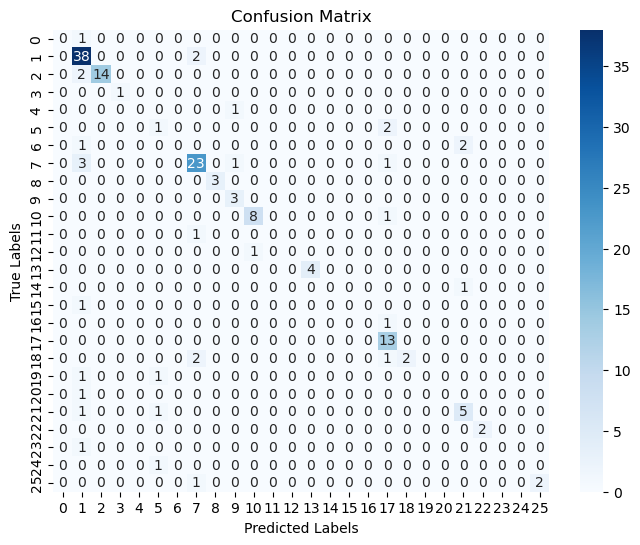

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the test set
predicted_labels = best_model.predict(test_corpus)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()